<a href="https://colab.research.google.com/github/neelima-2003/Classification/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Scikit Learn - Machine Learning with Python

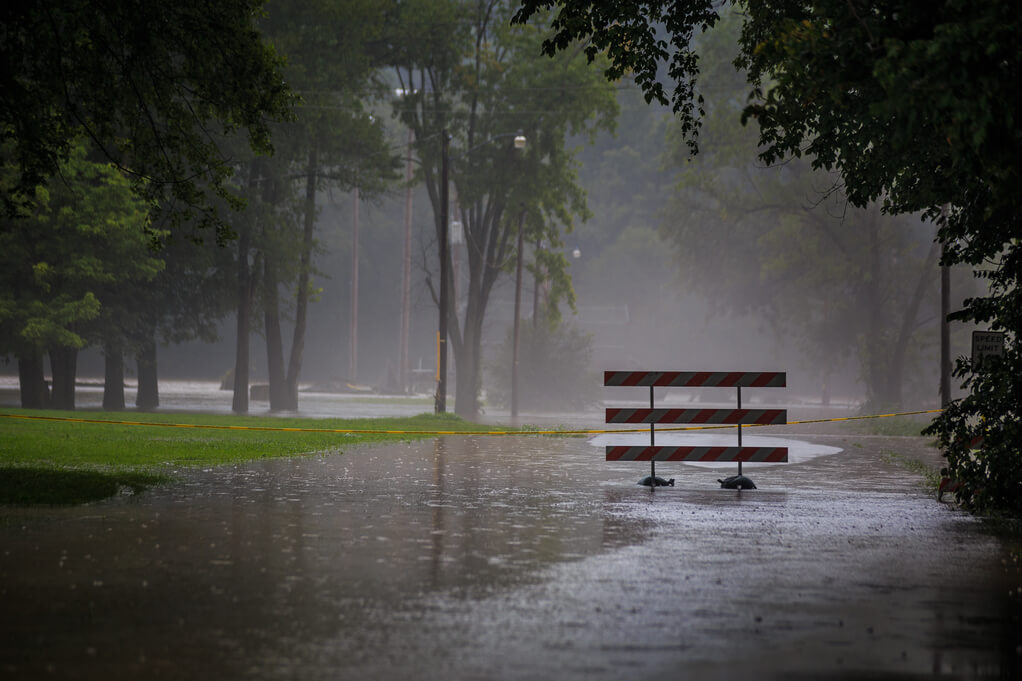

The following topics are covered in this tutorial:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set


### How to run the code

This tutorial is an executable [Jupyter notebook] You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Colab**. You will be prompted to connect your Google Drive account so that this notebook can be placed into your drive for execution.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.



## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to apply _logistic regression_ to a real-world dataset from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in USA dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
>
>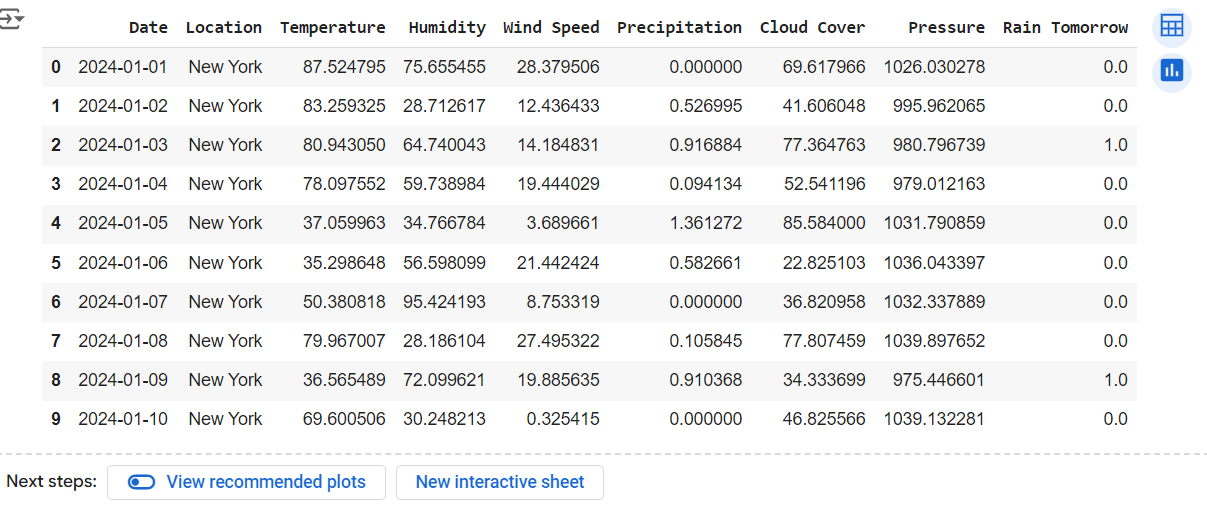
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.
>
>
>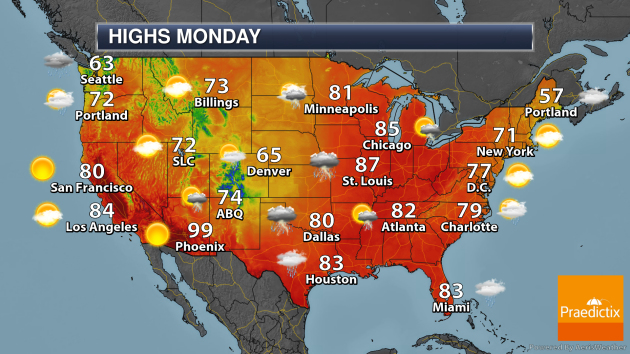


**EXERCISE**: Before proceeding further, take a moment to think about how you can approach this problem. List five or more ideas that come to your mind below:

1. ???
2. ???
3. ???
4. ???
5. ???

## Linear Regression vs. Logistic Regression

In the [previous tutorial](https://jovian.ai/aakashns/python-sklearn-linear-regression), we attempted to predict a person's annual medical charges using _linear regression_. In this tutorial, we'll use _logistic regression_, which is better suited for _classification_ problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a _classfication_ or _regression_ problem is an important first step in machine learning.

### Classification Problems


Problems where each input must be assigned a discrete category (also called label or class) are known as _classification problems_.

Here are some examples of classification problems:

- [Rainfall prediction](https://kaggle.com/jsphyg/weather-dataset-rattle-package): Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")
- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.

Can you think of some more classification problems?

> **EXERCISE**: Replicate the steps followed in this tutorial with each of the above datasets.


Classification problems can be binary (yes/no) or multiclass (picking one of many classes).


### Regression Problems

Problems where a continuous numeric value must be predicted for each input are known as _regression problems_.

Here are some example of regression problems:

- [Medical Charges Prediction](https://www.kaggle.com/subhakarks/medical-insurance-cost-analysis-and-prediction)
- [House Price Prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- [Ocean Temperature Prediction](https://www.kaggle.com/sohier/calcofi)
- [Weather Temperature Prediction](https://www.kaggle.com/budincsevity/szeged-weather)

Can you think of some more regression problems?

> **EXERCISE**: Replicate the steps followed in the [previous tutorial](https://jovian.ai/aakashns/python-sklearn-linear-regression) with each of the above datasets.


### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1)

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://i.imgur.com/g32CoIy.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)).

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

## Downloading the Data

We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. Let's install and import `opendatasets`.

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.__version__

'0.1.22'

The dataset can now be downloaded using `od.download`. When you execute `od.download`, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

Once the above command is executed, the dataset is downloaded and extracted to the the directory `weather-dataset-rattle-package`.
- Link:  'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [ ]:
url = 'https://www.kaggle.com/datasets/waqi786/usa-rainfall-prediction-dataset-2024-2025'

In [ ]:
# od.download(dataset_url)

Let's load the data from usa-rainfall-prediction.csv using Pandas.




In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/usa_rain_prediction_dataset_2024_2025.csv')

In [ ]:
data

Date         Location  Temperature   Humidity  Wind Speed  \
0      2024-01-01         New York    87.524795  75.655455   28.379506   
1      2024-01-02         New York    83.259325  28.712617   12.436433   
2      2024-01-03         New York    80.943050  64.740043   14.184831   
3      2024-01-04         New York    78.097552  59.738984   19.444029   
4      2024-01-05         New York    37.059963  34.766784    3.689661   
...           ...              ...          ...        ...         ...   
73095  2025-12-27  Washington D.C.    40.614393  65.099438   28.778327   
73096  2025-12-28  Washington D.C.    52.641643  30.610525   12.282890   
73097  2025-12-29  Washington D.C.    56.492591  96.740232    2.894762   
73098  2025-12-30  Washington D.C.    65.748956  63.900004   24.632400   
73099  2025-12-31  Washington D.C.    54.648609  80.812021   22.722505   

       Precipitation  Cloud Cover     Pressure  Rain Tomorrow  
0           0.000000    69.617966  1026.030278              0  
1           0.526995    41.606048   995.962065              0  
2           0.916884    77.364763   980.796739              1  
3           0.094134    52.541196   979.012163              0  
4           1.361272    85.584000  1031.790859              0  
...              ...          ...          ...            ...  
73095       0.000000    54.168514   977.083747              0  
73096       0.871000    22.068055   980.591675              0  
73097       1.191956    52.336048  1016.469174              1  
73098       0.483421    76.785280  1032.396146              1  
73099       0.151903    19.674960   974.835534              0  

[73100 rows x 9 columns]

The dataset contains over 73,100 rows and 9 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `RainTomorrow`.

Let's check the data types and missing values in the various columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


According to the info their is no null values present in the dataframe.So it is much easier to take the predictions.

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')

In [ ]:
px.histogram(data, x ='Location',color='Rain Tomorrow')

In [ ]:
px.histogram(data, x ='Temperature',color='Rain Tomorrow')

In [ ]:
px.histogram(data, x='Humidity',color='Rain Tomorrow')

In [ ]:
px.scatter(data.sample(2000), x='Location',y='Wind Speed',color='Rain Tomorrow')

In [ ]:
px.scatter(data.sample(2500),
           x= 'Temperature',
           y = 'Humidity',
           color = 'Rain Tomorrow')

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
train_df

Date      Location  Temperature   Humidity  Wind Speed  \
12934  2025-05-22       Houston    94.400847  30.101788   27.125792   
19473  2025-04-12  Philadelphia    42.347508  72.291153   11.864686   
13001  2025-07-28       Houston    61.599022  69.579675   25.963909   
26535  2024-08-07     San Diego    92.764507  90.944364   16.475073   
8236   2024-07-14       Chicago    42.108787  70.881935    1.662974   
...           ...           ...          ...        ...         ...   
37194  2025-10-06        Austin    81.345291  47.950863   22.680914   
6265   2025-02-21   Los Angeles    87.855075  46.571813   18.241801   
54886  2024-03-02     Charlotte    57.936711  99.862163   27.530248   
860    2024-05-09      New York    37.372584  57.254187   12.102843   
15795  2025-03-20       Phoenix    30.243766  44.644518    3.157928   

       Precipitation  Cloud Cover     Pressure  Rain Tomorrow  
12934       0.000000    22.156541   996.493324              0  
19473       0.000000    78.616367   990.436746              0  
13001       0.987198    65.356192   979.811993              1  
26535       0.000000    66.736579  1034.282752              0  
8236        0.000000    22.626918   998.666144              0  
...              ...          ...          ...            ...  
37194       0.210545    13.908810   981.054947              0  
6265        1.444926    57.305491   994.525451              0  
54886       0.176079    47.565287   970.430710              0  
860         1.337299    74.404842  1037.265833              0  
15795       0.618519    37.892758  1025.266718              0  

[58480 rows x 9 columns]

In [ ]:
test_df

Date      Location  Temperature   Humidity  Wind Speed  \
66127  2024-12-03        Denver    48.052607  60.603176   24.946214   
43485  2024-12-22  Jacksonville    76.409199  87.441871   14.162805   
34304  2025-11-09      San Jose    35.668016  68.053619   18.195591   
34317  2025-11-22      San Jose    63.633611  83.717856   23.486385   
38631  2025-09-11        Austin    51.459740  82.835612   25.238400   
...           ...           ...          ...        ...         ...   
8251   2024-07-29       Chicago    67.208056  64.385673   16.030553   
50745  2024-11-02      Columbus    45.469250  72.919642   25.240681   
50634  2024-07-14      Columbus    72.724727  82.438534   23.601837   
23941  2025-07-03   San Antonio    98.058249  74.555385    1.266644   
64694  2025-01-01       Seattle    32.609663  97.382944   23.163716   

       Precipitation  Cloud Cover     Pressure  Rain Tomorrow  
66127       0.000000    49.344512  1020.133430              0  
43485       0.060954    86.571375  1018.283834              0  
34304       0.942199    31.233485  1020.116697              1  
34317       0.259003    10.990360  1001.981662              0  
38631       0.087099    17.705639   976.618916              0  
...              ...          ...          ...            ...  
8251        0.956638    24.183251   979.489156              1  
50745       1.063573    88.898159   985.402385              1  
50634       0.807674    52.101779  1001.347558              1  
23941       1.581943    14.679097  1002.337602              1  
64694       0.000000    64.700798   975.944318              0  

[14620 rows x 9 columns]

In [ ]:
train_inputs = train_df.iloc[:,:8]
train_targets = train_df['Rain Tomorrow']
test_inputs = test_df.iloc[:,:8]
test_targets = test_df['Rain Tomorrow']


In [ ]:
print('train_df.shape:',train_df.shape)
print('test_df.shape:',test_df.shape)

train_df.shape: (58480, 9)
test_df.shape: (14620, 9)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

In [ ]:
data

Date         Location  Temperature   Humidity  Wind Speed  \
0      2024-01-01         New York    87.524795  75.655455   28.379506   
1      2024-01-02         New York    83.259325  28.712617   12.436433   
2      2024-01-03         New York    80.943050  64.740043   14.184831   
3      2024-01-04         New York    78.097552  59.738984   19.444029   
4      2024-01-05         New York    37.059963  34.766784    3.689661   
...           ...              ...          ...        ...         ...   
73095  2025-12-27  Washington D.C.    40.614393  65.099438   28.778327   
73096  2025-12-28  Washington D.C.    52.641643  30.610525   12.282890   
73097  2025-12-29  Washington D.C.    56.492591  96.740232    2.894762   
73098  2025-12-30  Washington D.C.    65.748956  63.900004   24.632400   
73099  2025-12-31  Washington D.C.    54.648609  80.812021   22.722505   

       Precipitation  Cloud Cover     Pressure  Rain Tomorrow  
0           0.000000    69.617966  1026.030278              0  
1           0.526995    41.606048   995.962065              0  
2           0.916884    77.364763   980.796739              1  
3           0.094134    52.541196   979.012163              0  
4           1.361272    85.584000  1031.790859              0  
...              ...          ...          ...            ...  
73095       0.000000    54.168514   977.083747              0  
73096       0.871000    22.068055   980.591675              0  
73097       1.191956    52.336048  1016.469174              1  
73098       0.483421    76.785280  1032.396146              1  
73099       0.151903    19.674960   974.835534              0  

[73100 rows x 9 columns]

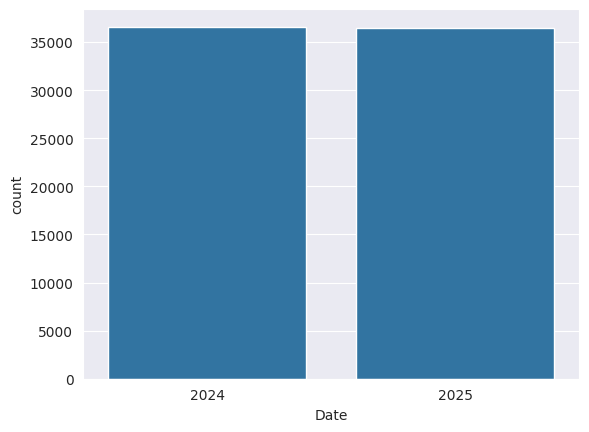

In [ ]:
sns.countplot(x=pd.to_datetime(data.Date).dt.year);

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = "Rain Tomorrow"

In [ ]:
print(input_cols)

['Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']


In [ ]:
target_col

'Rain Tomorrow'

We can now create inputs and targets for the training.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

Location  Temperature   Humidity  Wind Speed  Precipitation  \
12934       Houston    94.400847  30.101788   27.125792       0.000000   
19473  Philadelphia    42.347508  72.291153   11.864686       0.000000   
13001       Houston    61.599022  69.579675   25.963909       0.987198   
26535     San Diego    92.764507  90.944364   16.475073       0.000000   
8236        Chicago    42.108787  70.881935    1.662974       0.000000   
...             ...          ...        ...         ...            ...   
37194        Austin    81.345291  47.950863   22.680914       0.210545   
6265    Los Angeles    87.855075  46.571813   18.241801       1.444926   
54886     Charlotte    57.936711  99.862163   27.530248       0.176079   
860        New York    37.372584  57.254187   12.102843       1.337299   
15795       Phoenix    30.243766  44.644518    3.157928       0.618519   

       Cloud Cover     Pressure  
12934    22.156541   996.493324  
19473    78.616367   990.436746  
13001    65.356192   979.811993  
26535    66.736579  1034.282752  
8236     22.626918   998.666144  
...            ...          ...  
37194    13.908810   981.054947  
6265     57.305491   994.525451  
54886    47.565287   970.430710  
860      74.404842  1037.265833  
15795    37.892758  1025.266718  

[58480 rows x 7 columns]

In [ ]:
train_targets

12934    0
19473    0
13001    1
26535    0
8236     0
        ..
37194    0
6265     0
54886    0
860      0
15795    0
Name: Rain Tomorrow, Length: 58480, dtype: int64

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation',
 'Cloud Cover',
 'Pressure']

In [ ]:
categorical_cols

['Location']

Let's view some statistics for the numeric columns.

In [ ]:
train_inputs[numeric_cols].describe()

Temperature      Humidity    Wind Speed  Precipitation   Cloud Cover  \
count  58480.000000  58480.000000  58480.000000   58480.000000  58480.000000   
mean      65.168104     59.899575     15.004945       0.390065     54.945286   
std       20.219151     23.070258      8.672604       0.474260     25.975264   
min       30.000766     20.000272      0.000712       0.000000     10.000856   
25%       47.669035     39.796177      7.454837       0.000000     32.418889   
50%       65.267805     59.926432     15.111790       0.197289     55.018678   
75%       82.612040     79.895160     22.532425       0.671185     77.377221   
max       99.997393     99.999025     29.999017       3.026906     99.998957   

           Pressure  
count  58480.000000  
mean    1005.168934  
std       20.198495  
min      970.000919  
25%      987.683494  
50%     1005.314430  
75%     1022.684541  
max     1039.999765

Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [ ]:
train_inputs[categorical_cols].nunique()

Location    20
dtype: int64

Let's save our work before continuing.

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [ ]:
data[categorical_cols].nunique()

Location    20
dtype: int64

In [ ]:
data.shape

(73100, 9)

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [ ]:
encoder.fit(data[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.categories_

[array(['Austin', 'Charlotte', 'Chicago', 'Columbus', 'Dallas', 'Denver',
        'Fort Worth', 'Houston', 'Indianapolis', 'Jacksonville',
        'Los Angeles', 'New York', 'Philadelphia', 'Phoenix',
        'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Seattle',
        'Washington D.C.'], dtype=object)]

The encoder has created a list of categories for each of the categorical columns in the dataset.

We can generate column names for each individual category using `get_feature_names_out

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]).toarray()
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]).toarray()

We can verify that these new columns have been added to our training, test and validation sets.




In [ ]:
test_inputs

Location  Temperature   Humidity  Wind Speed  Precipitation  \
66127        Denver    48.052607  60.603176   24.946214       0.000000   
43485  Jacksonville    76.409199  87.441871   14.162805       0.060954   
34304      San Jose    35.668016  68.053619   18.195591       0.942199   
34317      San Jose    63.633611  83.717856   23.486385       0.259003   
38631        Austin    51.459740  82.835612   25.238400       0.087099   
...             ...          ...        ...         ...            ...   
8251        Chicago    67.208056  64.385673   16.030553       0.956638   
50745      Columbus    45.469250  72.919642   25.240681       1.063573   
50634      Columbus    72.724727  82.438534   23.601837       0.807674   
23941   San Antonio    98.058249  74.555385    1.266644       1.581943   
64694       Seattle    32.609663  97.382944   23.163716       0.000000   

       Cloud Cover     Pressure  Location_Austin  Location_Charlotte  \
66127    49.344512  1020.133430              0.0                 0.0   
43485    86.571375  1018.283834              0.0                 0.0   
34304    31.233485  1020.116697              0.0                 0.0   
34317    10.990360  1001.981662              0.0                 0.0   
38631    17.705639   976.618916              1.0                 0.0   
...            ...          ...              ...                 ...   
8251     24.183251   979.489156              0.0                 0.0   
50745    88.898159   985.402385              0.0                 0.0   
50634    52.101779  1001.347558              0.0                 0.0   
23941    14.679097  1002.337602              0.0                 0.0   
64694    64.700798   975.944318              0.0                 0.0   

       Location_Chicago  ...  Location_Los Angeles  Location_New York  \
66127               0.0  ...                   0.0                0.0   
43485               0.0  ...                   0.0                0.0   
34304               0.0  ...                   0.0                0.0   
34317               0.0  ...                   0.0                0.0   
38631               0.0  ...                   0.0                0.0   
...                 ...  ...                   ...                ...   
8251                1.0  ...                   0.0                0.0   
50745               0.0  ...                   0.0                0.0   
50634               0.0  ...                   0.0                0.0   
23941               0.0  ...                   0.0                0.0   
64694               0.0  ...                   0.0                0.0   

       Location_Philadelphia  Location_Phoenix  Location_San Antonio  \
66127                    0.0               0.0                   0.0   
43485                    0.0               0.0                   0.0   
34304                    0.0               0.0                   0.0   
34317                    0.0               0.0                   0.0   
38631                    0.0               0.0                   0.0   
...                      ...               ...                   ...   
8251                     0.0               0.0                   0.0   
50745                    0.0               0.0                   0.0   
50634                    0.0               0.0                   0.0   
23941                    0.0               0.0                   1.0   
64694                    0.0               0.0                   0.0   

       Location_San Diego  Location_San Francisco  Location_San Jose  \
66127                 0.0                     0.0                0.0   
43485                 0.0                     0.0                0.0   
34304                 0.0                     0.0                1.0   
34317                 0.0                     0.0                1.0   
38631                 0.0                     0.0                0.0   
...                   ...                     ...                ...   
8251       

Let's save our work before continuing.

In [ ]:
train_inputs.drop(columns = ['Location'], axis = 1,inplace=True)

In [ ]:
test_inputs.drop(columns = ['Location'], axis = 1,inplace=True)

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

We can train the model using `model.fit`.

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://i.imgur.com/g32CoIy.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

Let's check the weights and biases of the trained model.

In [ ]:
print(numeric_cols + encoded_cols)

['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Location_Austin', 'Location_Charlotte', 'Location_Chicago', 'Location_Columbus', 'Location_Dallas', 'Location_Denver', 'Location_Fort Worth', 'Location_Houston', 'Location_Indianapolis', 'Location_Jacksonville', 'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego', 'Location_San Francisco', 'Location_San Jose', 'Location_Seattle', 'Location_Washington D.C.']


In [ ]:
print(model.coef_.tolist())

[[-0.0024690915785437, 0.11274715501295253, -0.0037615137660988607, 4.44759292874301, -0.0002494621180211503, -0.011075141833296172, -0.05703981904218307, -0.04432938076963016, 0.04648393167837575, 0.02417588905877047, -0.0219994893934065, -0.011155526569071945, -0.01323009155835821, -0.023332799199601982, 0.00997669648528731, 0.02616268921644116, 0.04001526145493537, -0.026911878823024378, -0.005171356808853, 0.016328471298892804, -0.06180801073181474, 0.033058016643762546, 0.04272382648580333, 0.0017888738568910682, -0.017031389341283027, -0.0053893425511816855]]


In [ ]:
print(model.intercept_)

[-0.04668543]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test

In [ ]:
predictions = model.predict(test_inputs)

In [ ]:
predictions

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
test_targets

66127    0
43485    0
34304    1
34317    0
38631    0
        ..
8251     1
50745    1
50634    1
23941    1
64694    0
Name: Rain Tomorrow, Length: 14620, dtype: int64

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_predictions` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
accuracy_score(test_targets, predictions)

0.9067715458276334

The model achieves an accuracy of 90.6% on the logistic regression. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test_targets, predictions,normalize='true')

array([[0.96560823, 0.03439177],
       [0.29898493, 0.70101507]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 90.68%


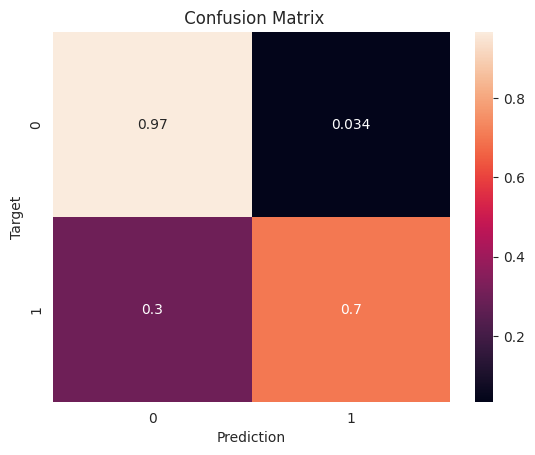

In [ ]:
predictions = predict_and_plot(test_inputs, test_targets)

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(train_inputs,train_targets)

DecisionTreeClassifier()

In [ ]:
predictions_dt = dt_model.predict(test_inputs)

In [ ]:
accuracy_score(test_targets,predictions_dt)

1.0

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
model_rf.fit(train_inputs,train_targets)

RandomForestClassifier()

In [ ]:
predictions_rf = model_rf.predict(test_inputs)

In [ ]:
accuracy_score(test_targets,predictions_rf)

1.0

Decision tree and the Random forest classifiers showing the 100% accuracy.It means our model is perfect.